In [12]:
import pandas as pd
import numpy as np
import platform
from matplotlib import font_manager,rc
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name, size=8)
else:
# Mac 인 경우
    rc('font',family='AppleGothic',size=8)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/한국전력공사_법정동별_상계거래_사용전력량_20191231.csv',encoding='cp949')\
#csv 파일을 data 변수 파일에 저장

In [3]:
data.head()
#변수에 저장된 데이터를 head 를 이용해 상위 5개를 뽑아서 데이터 보기

,시도,시군구,법정동,년도,월,전체호수,전력사용량
0,강원도,강릉시,강동면,2019,1,132,76515
1,강원도,강릉시,강동면,2019,2,132,73701
2,강원도,강릉시,강동면,2019,3,133,55273
3,강원도,강릉시,강동면,2019,4,135,63590
4,강원도,강릉시,강동면,2019,5,137,64840


In [13]:
gwangju.dropna(inplace=True)  
# gwangju 데이터 안에 있는 NaN값을 제거후 inplace를 사용해 저장
gwangju.reset_index(inplace=True,drop=True) 
# 인덱스를 초기화 하고 재배열후 inplace로 저장후 drop =True 를 이용해 기존열은 남겨둔다
gwangju.head()
#적용된 gwangju 데이터를 확인

,시도,시군구,법정동,년도,월,전체호수,전력사용량
0,광주광역시,광산구,고룡동,2019,1,0,0
1,광주광역시,광산구,고룡동,2019,2,0,0
2,광주광역시,광산구,고룡동,2019,3,0,0
3,광주광역시,광산구,고룡동,2019,4,0,0
4,광주광역시,광산구,고룡동,2019,5,0,0


In [14]:
gwangju = data[data['시도'] == '광주광역시']
#데이터 안에 있는 '시도' 행 에서 이름이 광주광역시인 데이터를 gwangju 변수에 저장
gwangju_rhkdtksrn = gwangju[gwangju['시군구'] == '광산구']
#위에서 저장한 gwangju 데이터 안에서 '시군구' 행에서 광산구 데이터를 gwangju_rhkdtksrn 변수에 저장
gwangju_qnrrn = gwangju[gwangju['시군구'] == '북구']
gwangju_skarn = gwangju[gwangju['시군구'] == '남구']
gwangju_ehdrn = gwangju[gwangju['시군구'] == '동구']
gwangju_tjrn = gwangju[gwangju['시군구'] == '서구']

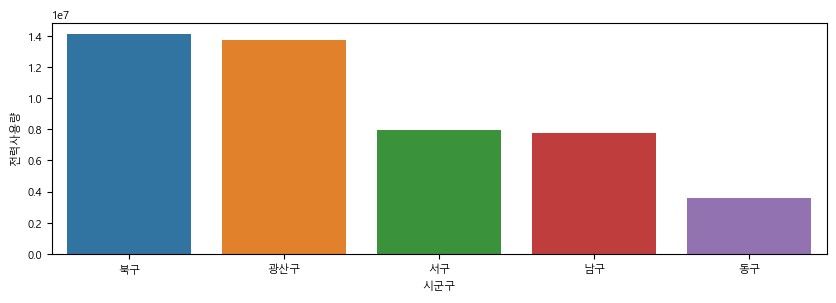

In [9]:
gwangju_g = gwangju.groupby('시군구')['전력사용량'].sum().sort_values(ascending=False)
# gwangju 안에 있는 행 '시군구' 와 '전력사용량'을 groupby 로 묶은뒤 mean() 으로 평균을 구한 후
# sort_values(ascending=Flase) 를 이용하여 평균값을 내림차순으로 정렬
gwangju_g = gwangju_g.reset_index()
#gwangju_g 정렬후 reset_index를 이용해 인덱스를 초기화 한 후 gwangju_g 에 저장
plt.figure(figsize=(10,3))
#figure(figsize=(x,y)) 를 이용하여 그래프 크기 결정 x= x축 , y = y 축 크기 결정
sns.barplot(data=gwangju_g,x= '시군구', y='전력사용량')
# gwangju_g에 있는 데이터를 bar 형태로 표시후 x 축에 '시군구' / y 축에는 '전력사용량'을 표시
plt.show()
#show 를 이용해 그래프 표시

In [10]:
gwangju_gs = gwangju_rhkdtksrn.groupby('법정동')['전력사용량'].sum().sort_values(ascending=False)
#위에서 광산구 데이터만 뺀 gwangju_rhkdtksrn 안에있는 동별 전력 사용량 평균을 구한 후 내림차순으로 정렬 후 gwangju_gs 에 저장
gwangju_gs = gwangju_rhkdtksrn.reset_index()
#reset_index로 gwangju_rhkdtksrn 인덱스를 초기화 시킨후 gwangju_gs 에 저장
gwangju_bk = gwangju_qnrrn.groupby('법정동')['전력사용량'].sum().sort_values(ascending=False)
gwangju_bk = gwangju_qnrrn.reset_index()
gwangju_sk = gwangju_tjrn.groupby('법정동')['전력사용량'].sum().sort_values(ascending=False)
gwangju_sk = gwangju_tjrn.reset_index()
gwangju_nk = gwangju_skarn.groupby('법정동')['전력사용량'].sum().sort_values(ascending=False)
gwangju_nk = gwangju_skarn.reset_index()
gwangju_dk = gwangju_ehdrn.groupby('법정동')['전력사용량'].sum().sort_values(ascending=False)
gwangju_dk = gwangju_ehdrn.reset_index()

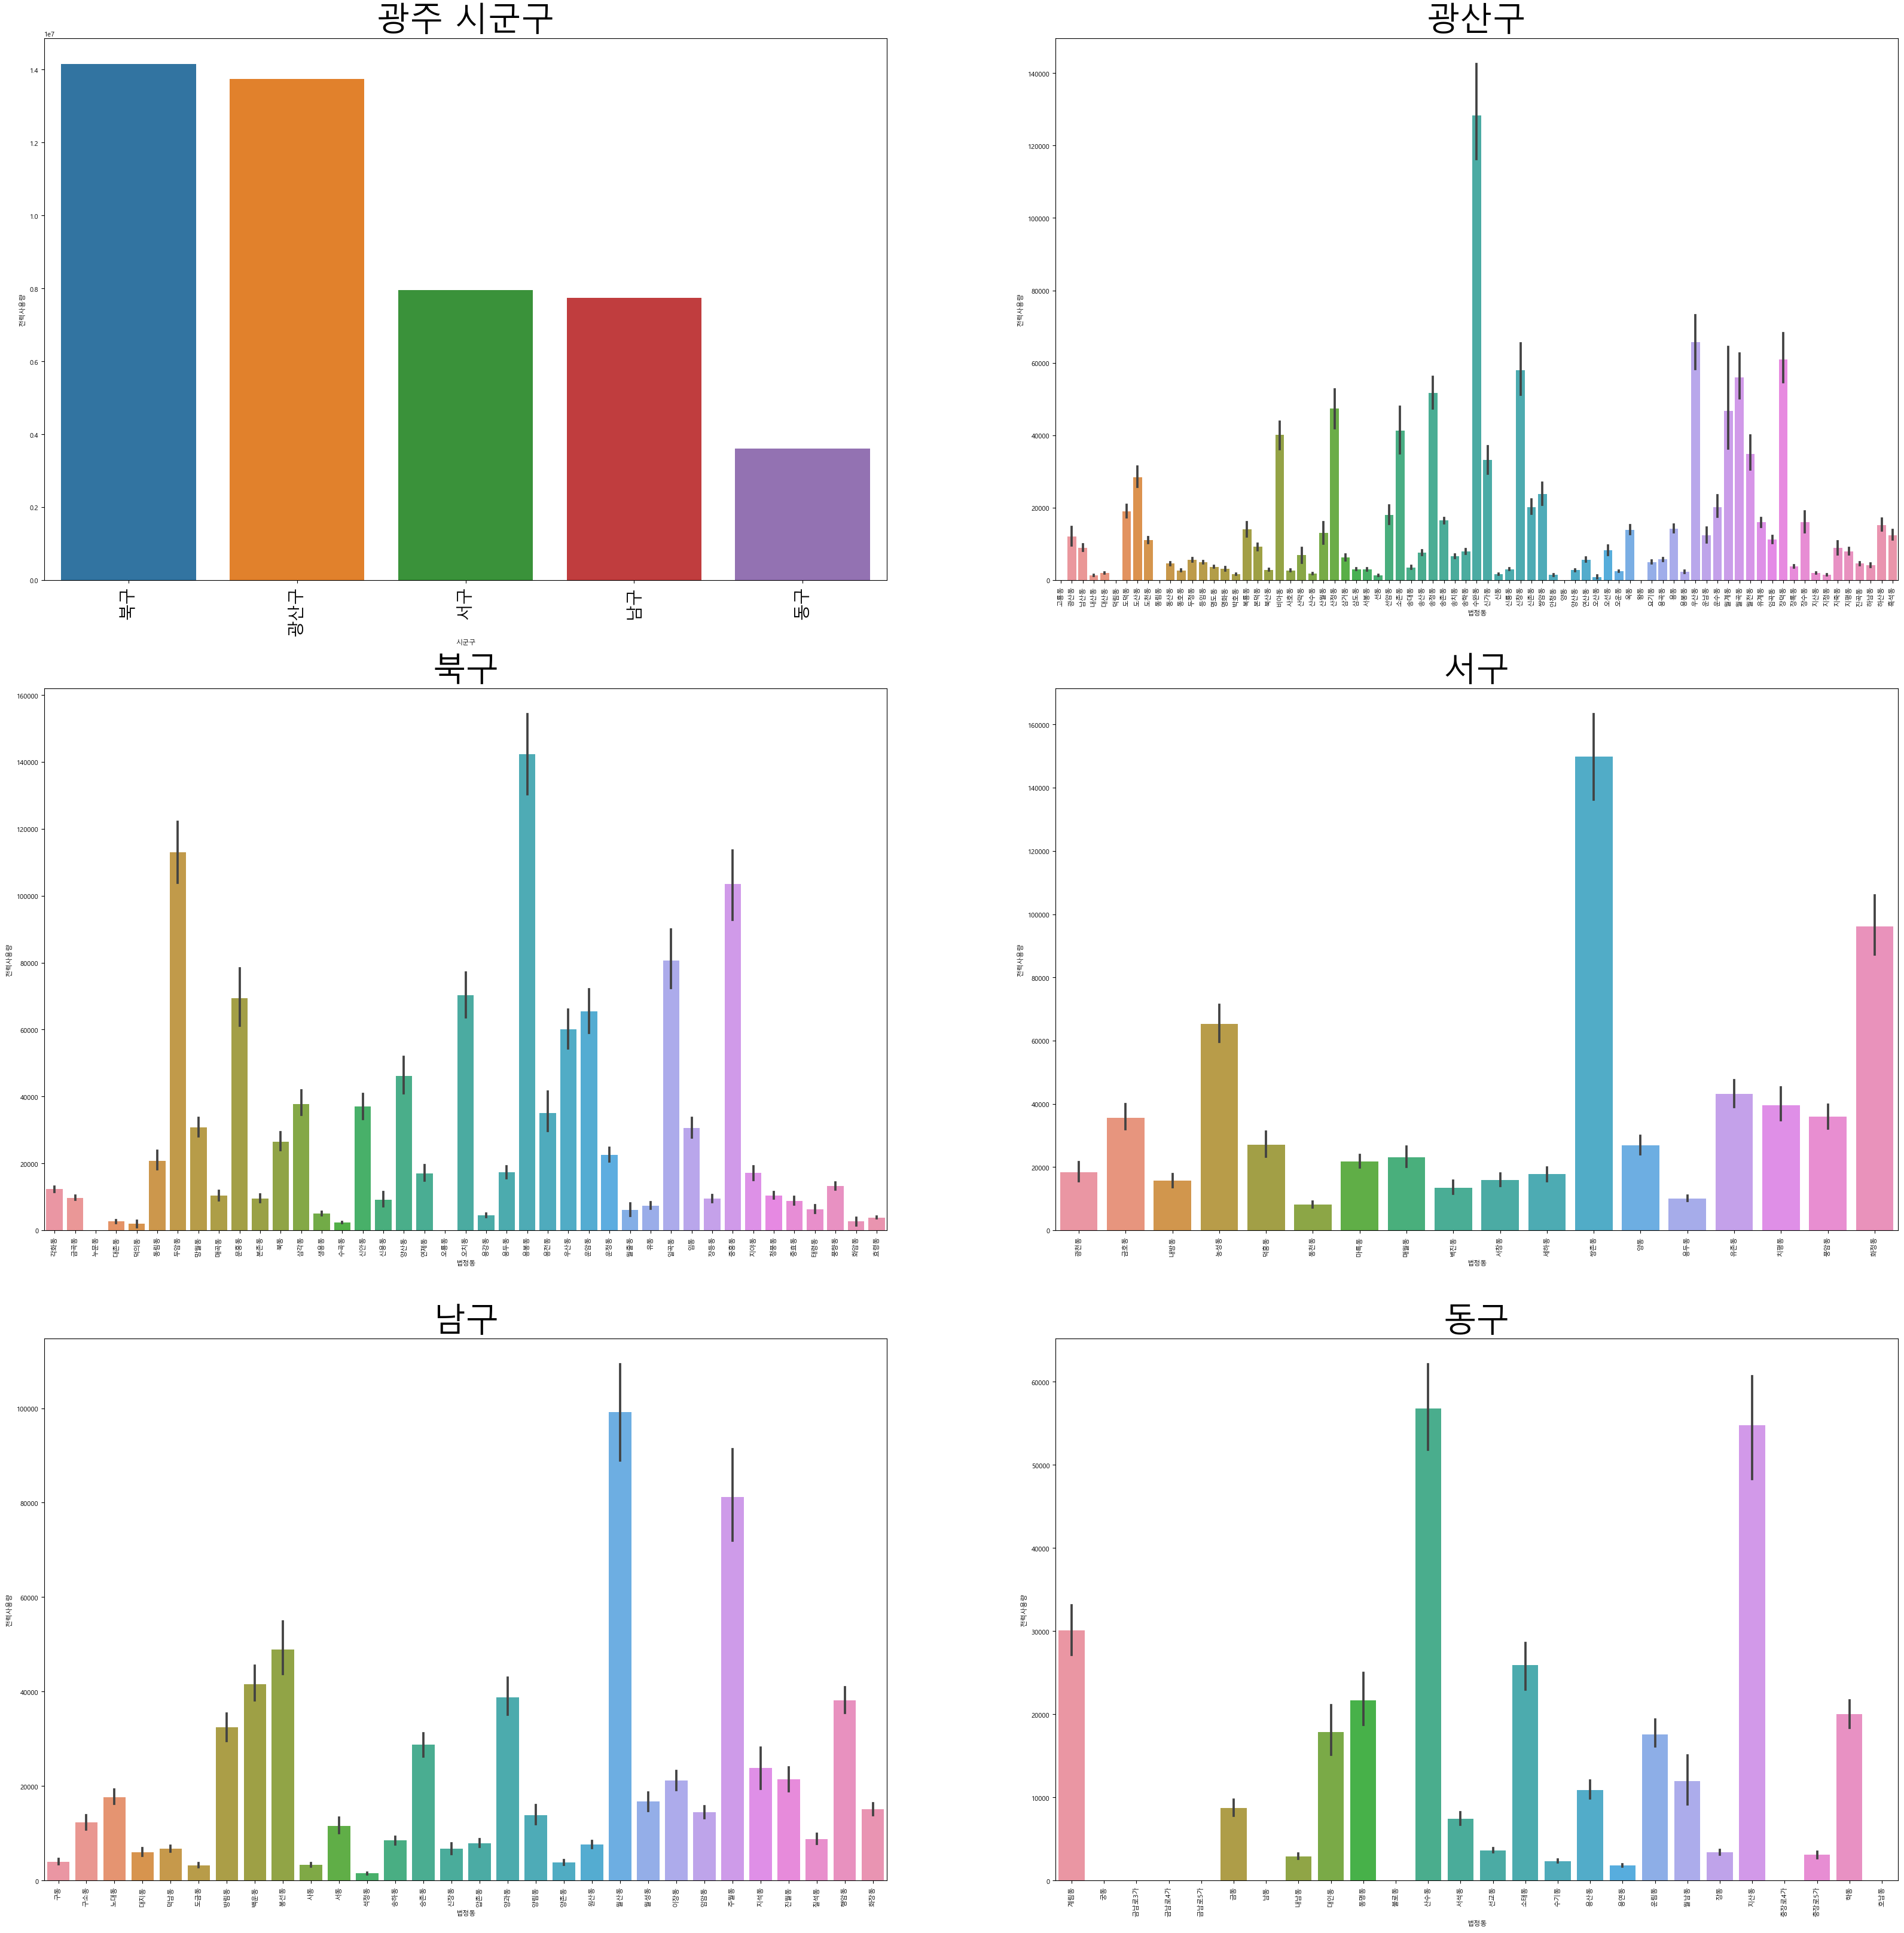

In [11]:
plt.figure(figsize=(40,40)) # 그래프 크기 조정
plt.subplot(3,2,1) # 3행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="시군구", y="전력사용량", data=gwangju_g)
# g 변수에 gwangju_g 데이터를 bar 형태의 그래프를 저장
g.set_title('광주 시군구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90,size=20)


plt.subplot(3,2,2) # 3행 2열의 두 번째(1행, 2열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_gs)
g.set_title('광산구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,3) # 3행 2열의 세 번째(2행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_bk)
g.set_title('북구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,4) # 3행 2열의 네 번째(2행, 2열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_sk)
g.set_title('서구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,5) # 3행 2열의 다섯 번째(3행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_nk)
g.set_title('남구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,6) # 3행 2열의 첫 번째(3행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_dk)
g.set_title('동구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()